# FOREX_chfjpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from Imbalanced_dataset_utility import *

### Loading the dataset and checking for null values

In [28]:
# Reading the file and checking if any null values are present

dforex = pd.read_csv("FOREX_chfjpy.csv")
print(dforex.info())
print("Null values present - ,", dforex.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   1832 non-null   object 
 1   Bid_Open    1832 non-null   float64
 2   Bid_High    1832 non-null   float64
 3   Bid_Low     1832 non-null   float64
 4   Bid_Close   1832 non-null   float64
 5   Bid_Volume  1832 non-null   float64
 6   Ask_Open    1832 non-null   float64
 7   Ask_High    1832 non-null   float64
 8   Ask_Low     1832 non-null   float64
 9   Ask_Close   1832 non-null   float64
 10  Ask_Volume  1832 non-null   float64
 11  Class       1832 non-null   bool   
dtypes: bool(1), float64(10), object(1)
memory usage: 159.4+ KB
None
Null values present - , False


In [3]:
# displaying the data

dforex.head()

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2011-12-31T23:00:00',81.863,81.952,81.863,81.952,0.0000,81.961,82.008,81.961,82.008,0.0000,False
1,'2012-01-01T23:00:00',81.954,82.304,81.636,81.787,35782.4102,81.986,82.423,81.748,81.848,35244.9298,True
2,'2012-01-02T23:00:00',81.791,82.364,81.712,82.301,155866.2610,81.854,82.395,81.736,82.341,156616.0903,False
3,'2012-01-03T23:00:00',82.301,82.402,81.275,81.445,132793.3208,82.337,82.438,81.290,81.478,131859.6802,False
4,'2012-01-04T23:00:00',81.444,81.529,80.795,80.934,172505.1388,81.477,81.548,80.810,80.974,180069.3571,False


In [4]:
# print the value counts of Class column and get the imbalance 

print(dforex["Class"].value_counts())
imbalance([dforex["Class"].value_counts()[0], dforex["Class"].value_counts()[1]])

True     921
False    911
Name: Class, dtype: int64


[49.72707423580786, 50.272925764192145]

### Plotting the columns

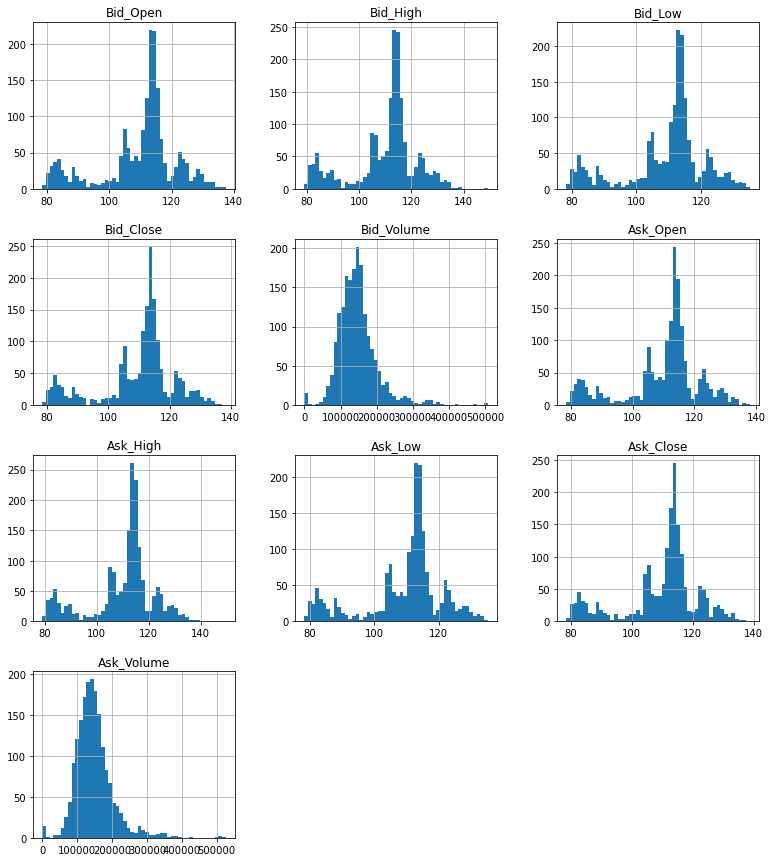

In [5]:

_ = dforex.hist(bins=50, figsize=(13,15))

### Creating a correlation matrix 

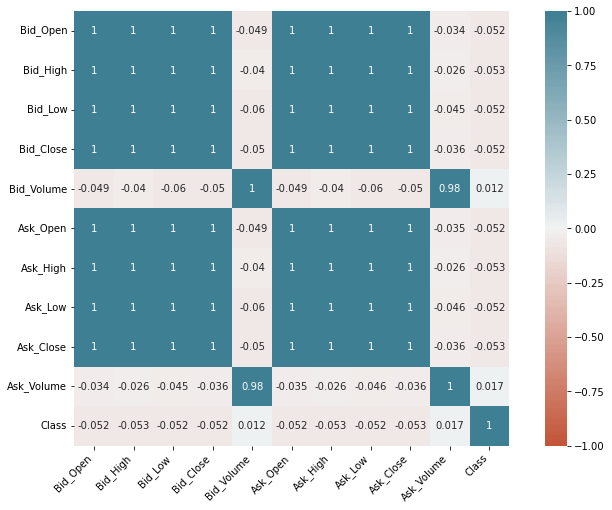

In [6]:

plt.figure(figsize = (13,8))
ax = sn.heatmap(
    dforex.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Preprocessing the dataset before creating a baseline model

In [7]:
dforex = preprocess_forex(dforex)

/Users/ajaymalik/Desktop/Folders/DSDM/Dsdm Assignment/Data and report 2/utils.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop("Timestamp", 1)


### Creating a random forest classifier as a baseline model on the original dataset

In [8]:
Y_df = dforex["Class"]
X_df = dforex
X_df = X_df.drop("Class", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=700, max_depth=6)

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70878/1548442802.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Class", 1)


--------------Scores------------
[0.58333333 0.58823529 0.54658385 0.56774194 0.4379562  0.54901961
 0.6122449  0.60465116 0.59627329 0.53012048]
F1 score: 0.56 +/- 0.05


## Forex_chfjpy with low imbalance (65%)

In [9]:
# adding 65% imbalance to the data

data_imbalanced_1 = create_imbalanced_data_for_forex(0.65, 900)
print(imbalance([data_imbalanced_1["Class"].value_counts()[0], data_imbalanced_1["Class"].value_counts()[1]]))

data_imbalanced_1 = preprocess_forex(data_imbalanced_1)


[34.44839857651246, 65.55160142348755]


/Users/ajaymalik/Desktop/Folders/DSDM/Dsdm Assignment/Data and report 2/utils.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop("Timestamp", 1)


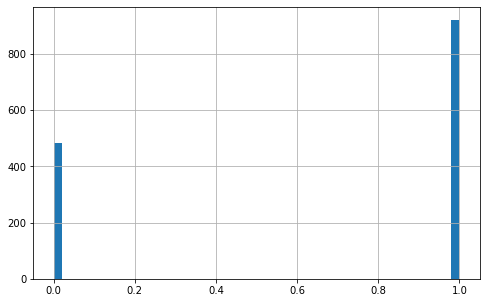

In [10]:
_ = data_imbalanced_1["Class"].hist(bins=50, figsize=(8,5))

# 

### Creating a random forest classifier model on dataset with low imbalance


In [11]:
# data_imbalanced_1 = data_imbalanced_1.drop("Timestamp", 1)
Y_df = data_imbalanced_1["Class"]
X_df = data_imbalanced_1
X_df = X_df.drop("Class", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=700, max_depth=6)
# dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))



/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70878/2520484272.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Class", 1)


--------------Scores------------
[0.76502732 0.79347826 0.78494624 0.78688525 0.7826087  0.76404494
 0.78688525 0.78918919 0.79120879 0.78688525]
F1 score: 0.78 +/- 0.01


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with low imbalance


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


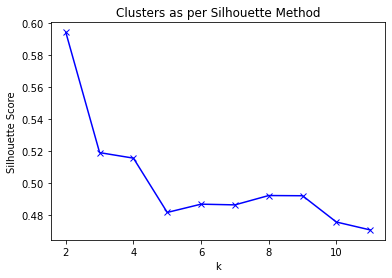

Enter number of clusters for the silhouette graph: 2


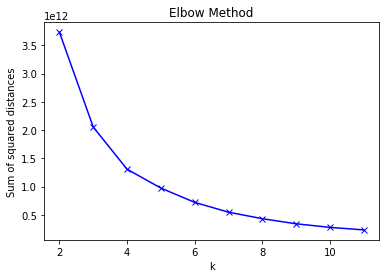

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6193278677946915 for n_clusters = 2
Run  1  is now complete...
-------------------------------
Run number:  2


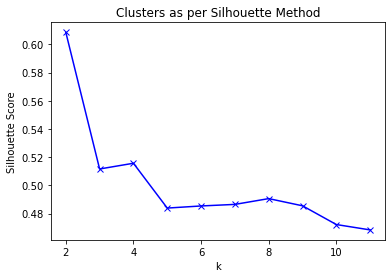

Enter number of clusters for the silhouette graph: 2


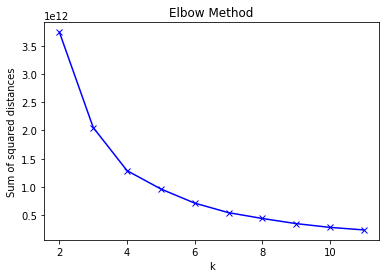

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.4455799970015281 for n_clusters = 3
Run  2  is now complete...
-------------------------------
Run number:  3


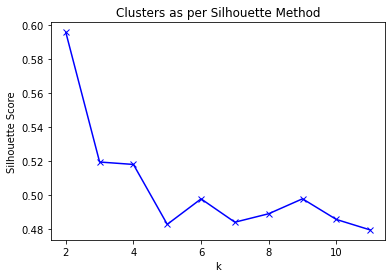

Enter number of clusters for the silhouette graph: 2


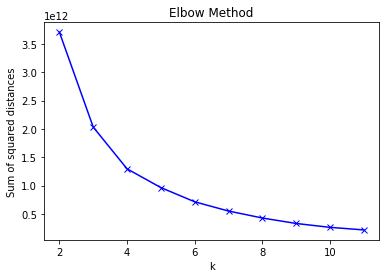

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6250805844857996 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


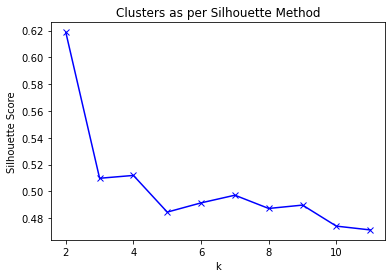

Enter number of clusters for the silhouette graph: 2


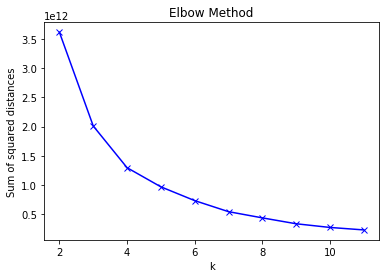

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6467960643042537 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


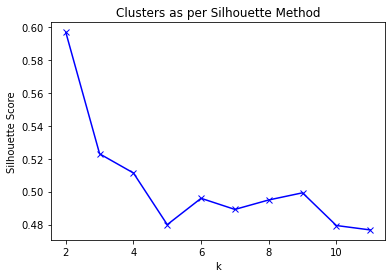

Enter number of clusters for the silhouette graph: 2


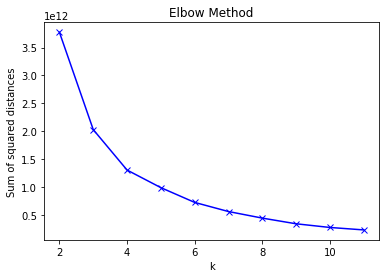

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.44494509635729446 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


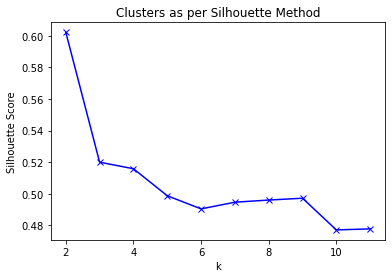

Enter number of clusters for the silhouette graph: 2


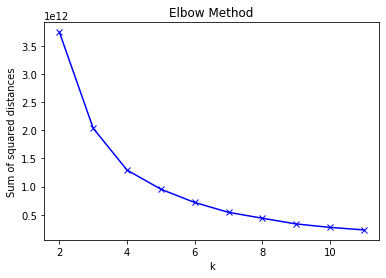

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6297145872756934 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


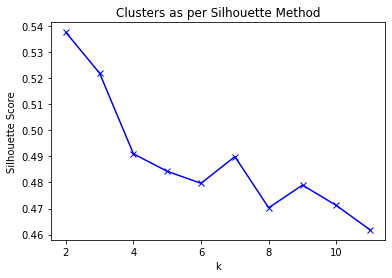

Enter number of clusters for the silhouette graph: 2


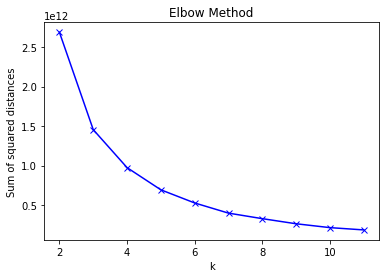

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.4225900195293547 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


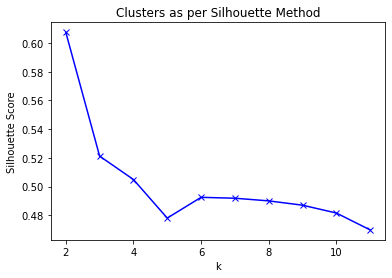

Enter number of clusters for the silhouette graph: 2


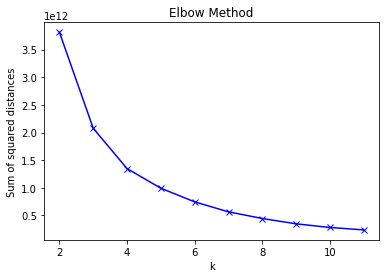

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.4643384462025288 for n_clusters = 3
Run  8  is now complete...
-------------------------------
Run number:  9


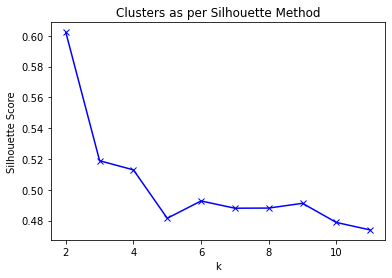

Enter number of clusters for the silhouette graph: 2


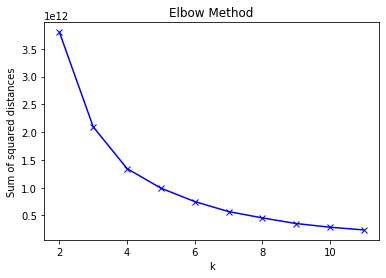

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6318317341090227 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


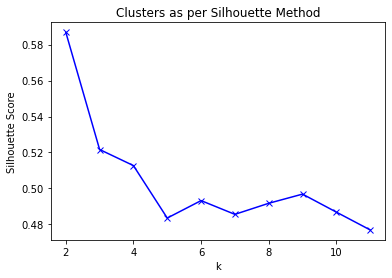

Enter number of clusters for the silhouette graph: 2


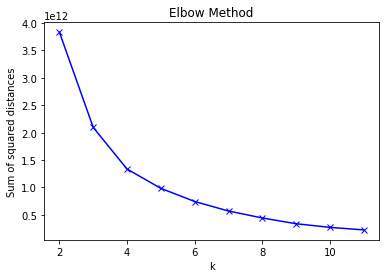

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6098138580423754 for n_clusters = 2
Run  10  is now complete...
-------------------------------


In [12]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [13]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.4246 +/- 0.1477
PRECISION: 0.4865 +/- 0.2251
ACCURACY: 0.4246 +/- 0.1477
F1: 0.4472 +/- 0.1789


# 

### Box plots comparing the two models


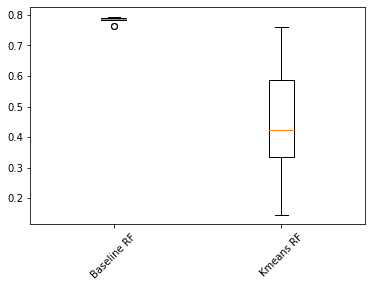

In [14]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

## Forex_chfjpy with medium imbalance (75%)

In [15]:
# adding 65% imbalance to the data

data_imbalanced_2 = create_imbalanced_data_for_forex(0.75, 900)
print(imbalance([data_imbalanced_2["Class"].value_counts()[0], data_imbalanced_2["Class"].value_counts()[1]]))

data_imbalanced_2 = preprocess_forex(data_imbalanced_2)


[24.57002457002457, 75.42997542997543]


/Users/ajaymalik/Desktop/Folders/DSDM/Dsdm Assignment/Data and report 2/utils.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop("Timestamp", 1)


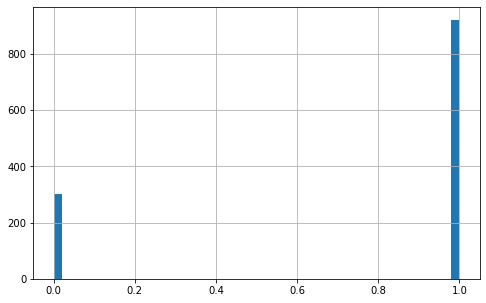

In [16]:
_ = data_imbalanced_2["Class"].hist(bins=50, figsize=(8,5))

# 

### Creating a random forest classifier model on dataset with medium imbalance


In [17]:
# data_imbalanced_1 = data_imbalanced_1.drop("Timestamp", 1)
Y_df = data_imbalanced_2["Class"]
X_df = data_imbalanced_2
X_df = X_df.drop("Class", 1)


from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets


from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=700, max_depth=6)
# dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))


/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_70878/2805166567.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Class", 1)


--------------Scores------------
[0.85380117 0.86046512 0.84023669 0.84023669 0.83333333 0.85380117
 0.8502994  0.85882353 0.85882353 0.85882353]
F1 score: 0.85 +/- 0.01


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with medium imbalance


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


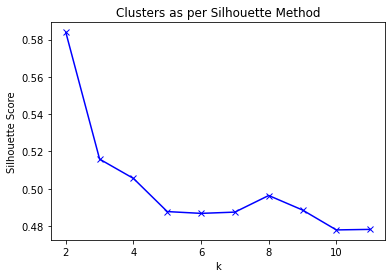

Enter number of clusters for the silhouette graph: 2


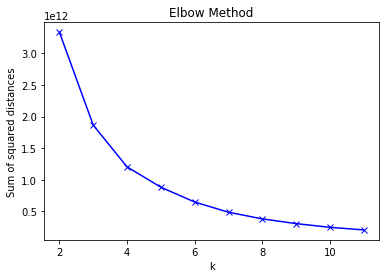

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.43017039605749263 for n_clusters = 3
Run  1  is now complete...
-------------------------------
Run number:  2


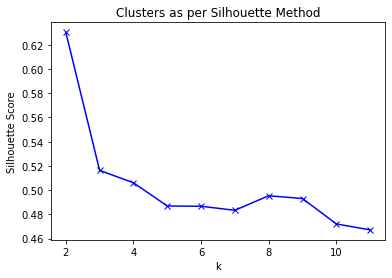

Enter number of clusters for the silhouette graph: 2


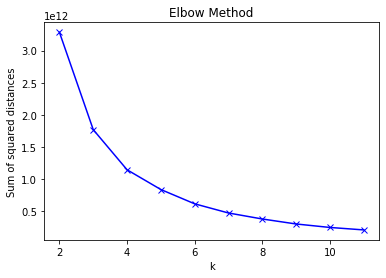

Enter number of clusters for the elbow graph: 2
Best performing clustering F1-score is: 0.367655975113688 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


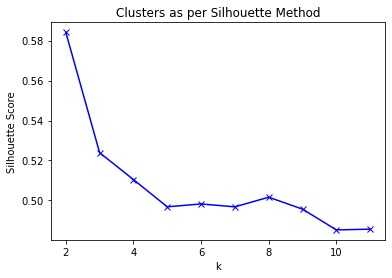

Enter number of clusters for the silhouette graph: 2


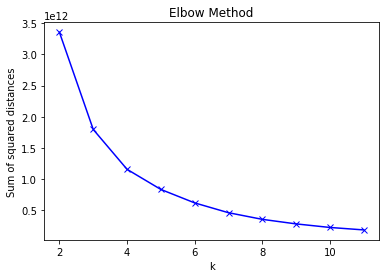

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.36975919997271944 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


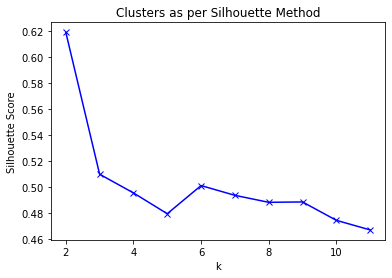

Enter number of clusters for the silhouette graph: 2


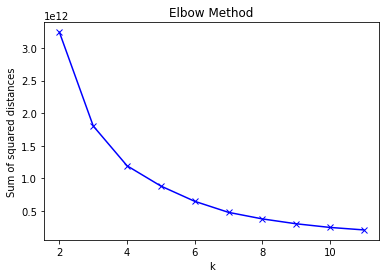

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.43516868731271885 for n_clusters = 3
Run  4  is now complete...
-------------------------------
Run number:  5


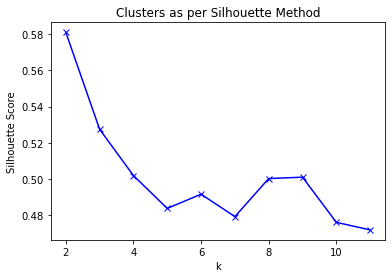

Enter number of clusters for the silhouette graph: 3


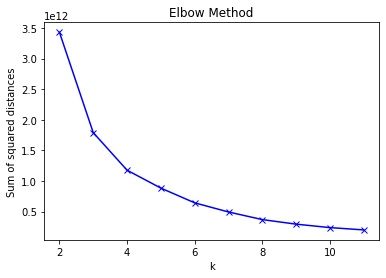

Enter number of clusters for the elbow graph: 2
Best performing clustering F1-score is: 0.6457309464564185 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


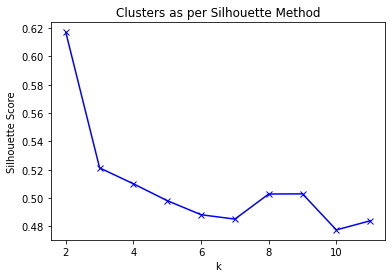

Enter number of clusters for the silhouette graph: 2


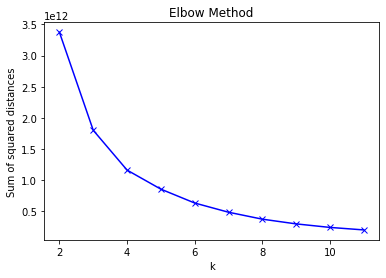

Enter number of clusters for the elbow graph: 2
Best performing clustering F1-score is: 0.36843649637475867 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


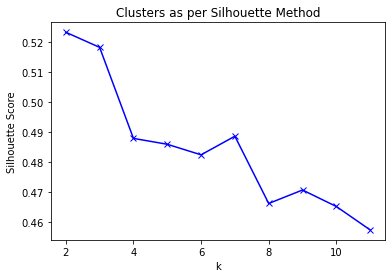

Enter number of clusters for the silhouette graph: 3


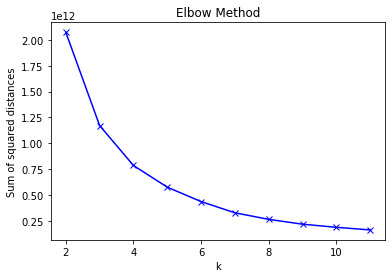

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.14128626093601135 for n_clusters = 3
Run  7  is now complete...
-------------------------------
Run number:  8


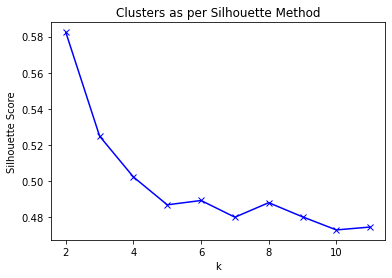

Enter number of clusters for the silhouette graph: 2


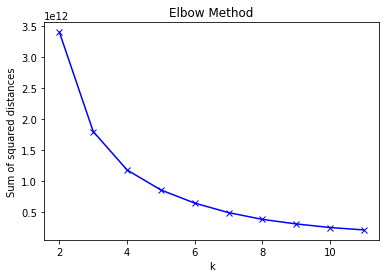

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6600159034241945 for n_clusters = 2
Run  8  is now complete...
-------------------------------
Run number:  9


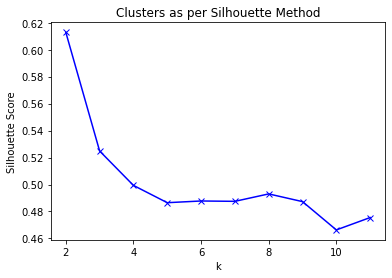

Enter number of clusters for the silhouette graph: 2


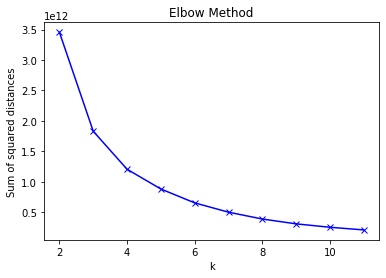

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.37275269455550264 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


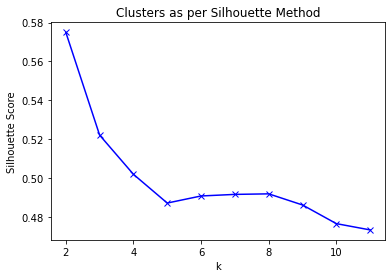

Enter number of clusters for the silhouette graph: 4


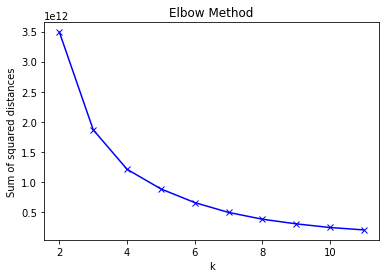

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.1522843120198538 for n_clusters = 4
Run  10  is now complete...
-------------------------------


In [18]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [19]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.5777 +/- 0.1588
PRECISION: 0.6393 +/- 0.2468
ACCURACY: 0.5777 +/- 0.1588
F1: 0.6005 +/- 0.1999


# 

### Box plots comparing the two models

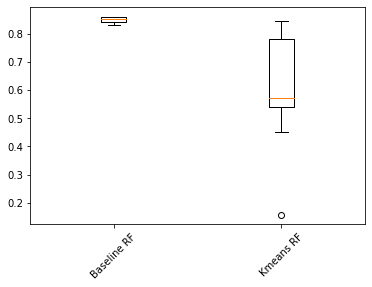

In [20]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

# 

## Forex_chfjpy dataset with high imbalance (90%)

In [3]:
# adding 65% imbalance to the data

data_imbalanced_3 = create_imbalanced_data_for_forex(0.90, 900)
print(imbalance([data_imbalanced_3["Class"].value_counts()[0], data_imbalanced_3["Class"].value_counts()[1]]))

data_imbalanced_3 = preprocess_forex(data_imbalanced_3)


[9.79431929480901, 90.205680705191]


/Users/ajaymalik/Desktop/Folders/DSDM/Dsdm Assignment/Data and report 2/Imbalanced_dataset_utility.py:59: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop("Timestamp", 1)


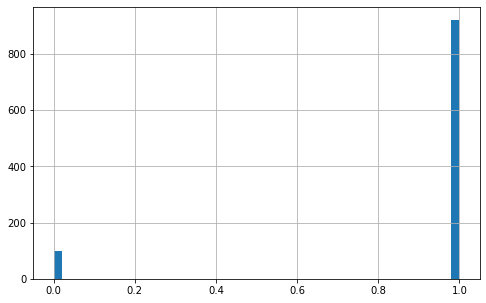

In [4]:
_ = data_imbalanced_3["Class"].hist(bins=50, figsize=(8,5))

# 

### Creating a random forest classifier model on dataset with high imbalance

In [5]:
# data_imbalanced_1 = data_imbalanced_1.drop("Timestamp", 1)
Y_df = data_imbalanced_3["Class"]
X_df = data_imbalanced_3
X_df = X_df.drop("Class", 1)


from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets


from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf3 = RandomForestClassifier(n_estimators=700, max_depth=6)
# dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution

base_scores = cross_val_score(clf3, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))



/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_888/626508171.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("Class", 1)


--------------Scores------------
[0.94871795 0.94871795 0.93506494 0.94871795 0.94871795 0.94871795
 0.94117647 0.94805195 0.94805195 0.94805195]
F1 score: 0.95 +/- 0.00


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with high imbalance

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


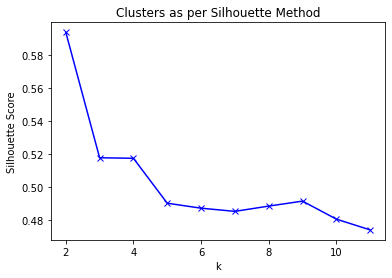

Enter number of clusters for the silhouette graph: 2


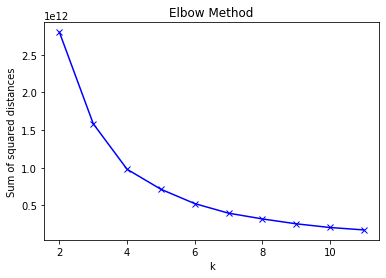

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.3316302816654352 for n_clusters = 4
Run  1  is now complete...
-------------------------------
Run number:  2


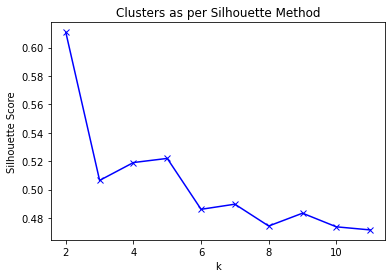

Enter number of clusters for the silhouette graph: 2


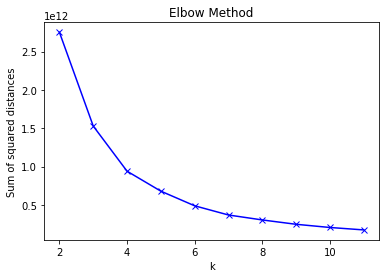

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.7352457418635571 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


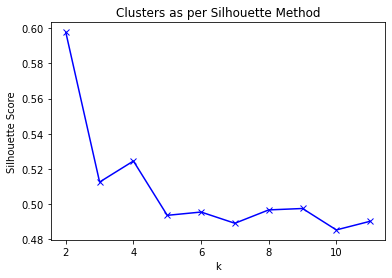

Enter number of clusters for the silhouette graph: 2


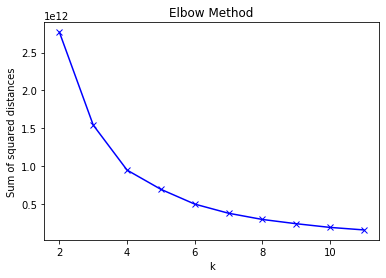

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.3560037832434244 for n_clusters = 3
Run  3  is now complete...
-------------------------------
Run number:  4


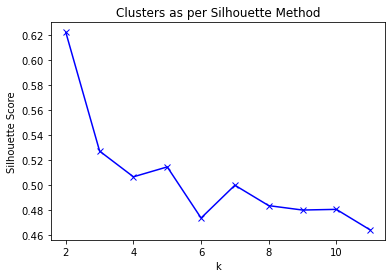

Enter number of clusters for the silhouette graph: 2


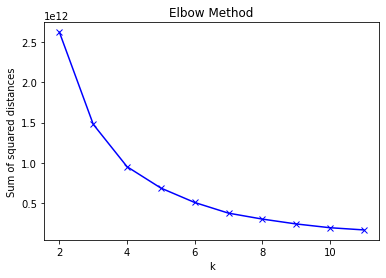

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.7383044365381672 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


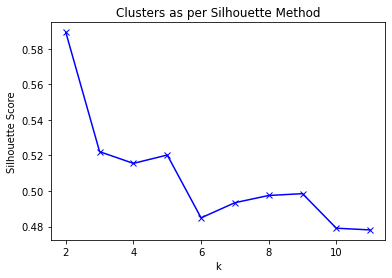

Enter number of clusters for the silhouette graph: 2


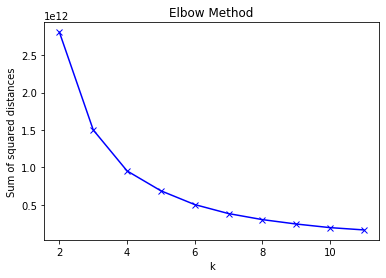

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6824705949100557 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


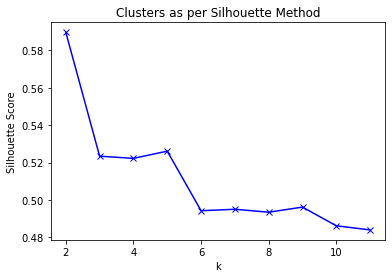

Enter number of clusters for the silhouette graph: 2


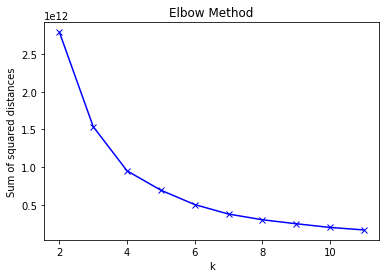

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.29674159191800054 for n_clusters = 3
Run  6  is now complete...
-------------------------------
Run number:  7


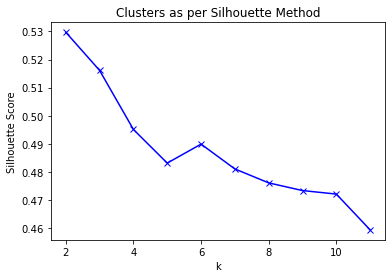

Enter number of clusters for the silhouette graph: 2


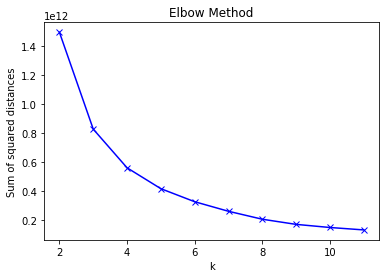

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.2870943730220953 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


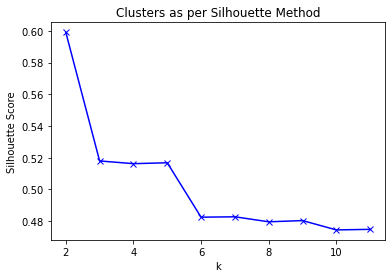

Enter number of clusters for the silhouette graph: 2


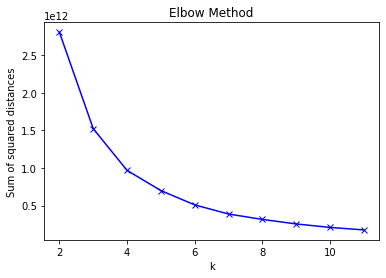

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.33895059581733905 for n_clusters = 3
Run  8  is now complete...
-------------------------------
Run number:  9


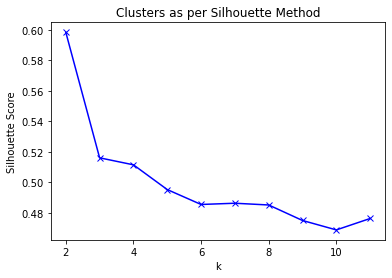

Enter number of clusters for the silhouette graph: 2


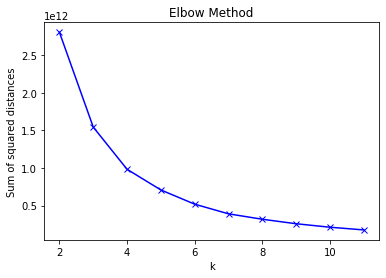

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.21388336237027142 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


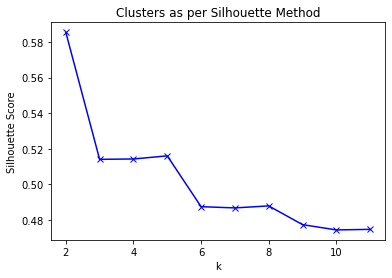

Enter number of clusters for the silhouette graph: 2


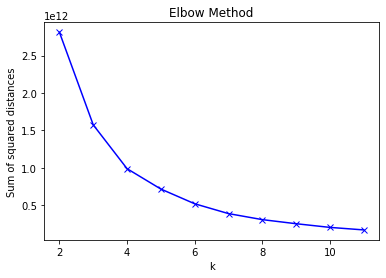

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.6676413933843847 for n_clusters = 2
Run  10  is now complete...
-------------------------------


In [24]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [25]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.8172 +/- 0.1225
PRECISION: 0.8484 +/- 0.1984
ACCURACY: 0.8172 +/- 0.1225
F1: 0.8283 +/- 0.1678


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

# 

### Box plots comparing the two models 

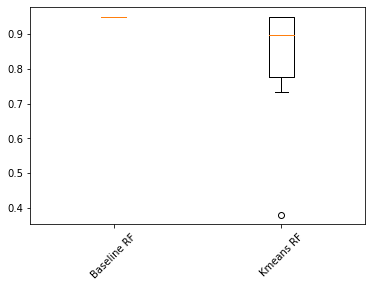

In [26]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()